In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
path =  "/content/gdrive/My Drive/customerdata.csv"

In [ ]:
# read the datafile
data = pd.read_csv(path, encoding = "ISO-8859-1")

In [ ]:
#shape of data
data.shape

(541909, 8)

In [ ]:
#check first five rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
#descriptive statistics of data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#function to display percentage of missing data
def missing_statistics(df):    
    statitics = pd.DataFrame(df.isnull().sum()).reset_index()
    statitics.columns=['COLUMN NAME',"MISSING VALUES"]
    statitics['TOTAL ROWS'] = df.shape[0]
    statitics['% MISSING'] = round((statitics['MISSING VALUES']/statitics['TOTAL ROWS'])*100,2)
    return statitics

In [ ]:
missing_statistics(data)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,InvoiceNo,0,541909,0.00
1,StockCode,0,541909,0.00
2,Description,1454,541909,0.27
3,Quantity,0,541909,0.00
4,InvoiceDate,0,541909,0.00
5,UnitPrice,0,541909,0.00
6,CustomerID,135080,541909,24.93
7,Country,0,541909,0.00


In [ ]:
# drop missing values
data = data.dropna(subset=["CustomerID"])

In [ ]:
missing_statistics(data)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,InvoiceNo,0,406829,0.0
1,StockCode,0,406829,0.0
2,Description,0,406829,0.0
3,Quantity,0,406829,0.0
4,InvoiceDate,0,406829,0.0
5,UnitPrice,0,406829,0.0
6,CustomerID,0,406829,0.0
7,Country,0,406829,0.0


In [ ]:
#check for duplication entries
print('Dupplicate entries: {}'.format(data.duplicated().sum()))

Dupplicate entries: 5225


In [ ]:
#drop duplicate entries
data.drop_duplicates(inplace = True)

In [ ]:
#check data type
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
data.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
401599,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
401600,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
401601,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
401602,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#Feature Engineering

In [ ]:
data = data.drop(['InvoiceNo','StockCode', 'InvoiceDate', 'CustomerID', 'Description'], axis=1)

In [ ]:
#coverting country into numerical
labelEncoder = LabelEncoder()
labelEncoder.fit(data['Country'])
data['Country'] = labelEncoder.transform(data['Country'])

In [ ]:
#create a new a column Amount
data['Amount'] = data.Quantity * data.UnitPrice

In [ ]:
#remove outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
from sklearn.cluster import KMeans

wcss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    wcss.append(kmeanModel.inertia_)

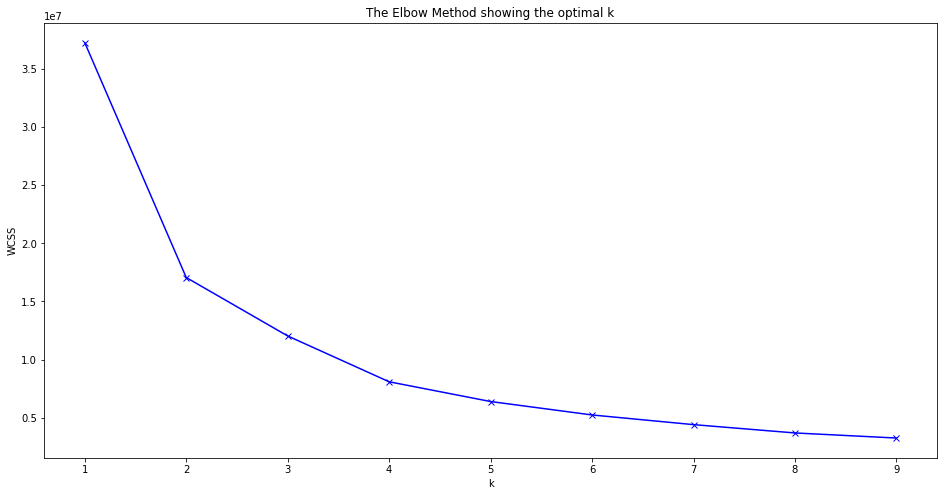

In [ ]:
#find the optimal number of clusters using the elbow method
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
km = KMeans(n_clusters=4)

In [ ]:
Label = km.fit_predict(data)

In [ ]:
#remove negative values
data = data[(data >= 0) ]

In [ ]:
data['Label'] = Label

In [ ]:
data.head()

,Quantity,UnitPrice,Country,Amount,Label
0,6.0,2.55,35,15.30,1
1,6.0,3.39,35,20.34,1
2,8.0,2.75,35,22.00,1
3,6.0,3.39,35,20.34,1
4,6.0,3.39,35,20.34,1


In [ ]:
#filter clusters
Zero_data = data[(data['Label'] == 0) ]
One_data = data[(data['Label'] == 1) ]
Two_data = data[(data['Label'] == 2) ]
Three_data = data[(data['Label'] == 3)]

In [ ]:
#Getting the Centroids
centroids = km.cluster_centers_

In [ ]:
print(centroids)

[[ 2.58490668  1.97957447 35.          3.54328995]
 [ 7.9248573   2.54500228 35.         15.45628658]
 [14.39861466  2.63901748 35.         30.7094805 ]
 [23.28952099  0.5118822  35.         11.7980607 ]]


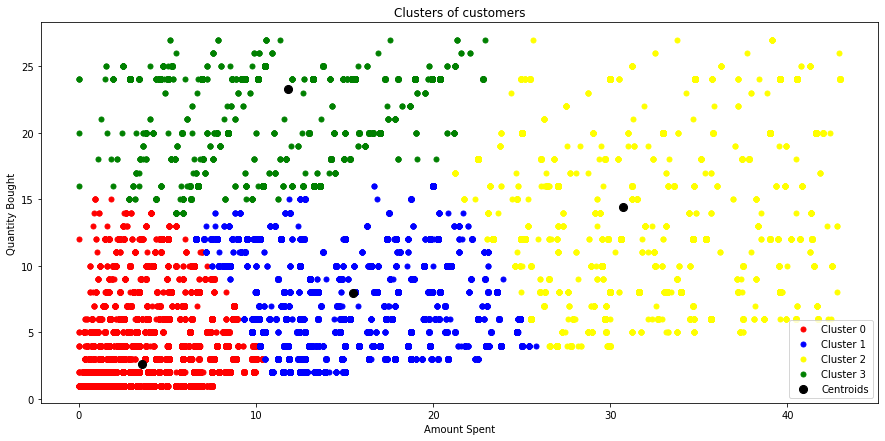

In [ ]:
#plotting the results
plt.figure(figsize=(15, 7))
plt.scatter(Zero_data['Amount'] , Zero_data['Quantity'], color = 'red', label = 'Cluster 0', s =25)
plt.scatter(One_data['Amount'] , One_data['Quantity'], color = 'blue', label = 'Cluster 1', s=25)
plt.scatter(Two_data['Amount'] , Two_data['Quantity'], color = 'yellow', label = 'Cluster 2', s=25)
plt.scatter(Three_data['Amount'] , Three_data['Quantity'], color = 'green', label = 'Cluster 3', s=25)
plt.scatter(km.cluster_centers_[:, 3], km.cluster_centers_[:, 0], s=65, c='black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Amount Spent')
plt.ylabel('Quantity Bought')
plt.legend()
plt.show()
